In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import scipy.signal as sig

In [2]:
d = scipy.io.loadmat('header.mat')

In [3]:
d

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Sun Mar 24 12:49:55 2019',
 '__version__': '1.0',
 '__globals__': [],
 'Header': array([[array(['Time'], dtype='<U4'), array(['Fp1'], dtype='<U3'),
         array(['Fp2'], dtype='<U3'), array(['Fc5'], dtype='<U3'),
         array(['Fz'], dtype='<U2'), array(['Fc6'], dtype='<U3'),
         array(['T7'], dtype='<U2'), array(['Cz'], dtype='<U2'),
         array(['T8'], dtype='<U2'), array(['P7'], dtype='<U2'),
         array(['P3'], dtype='<U2'), array(['Pz'], dtype='<U2'),
         array(['P4'], dtype='<U2'), array(['P8'], dtype='<U2'),
         array(['O1'], dtype='<U2'), array(['Oz'], dtype='<U2'),
         array(['O2'], dtype='<U2'), array(['EyesClosed'], dtype='<U10'),
         array(['EyesOpened'], dtype='<U10')]], dtype=object)}

In [4]:
d['Header'].squeeze().shape

(19,)

In [5]:
column_names = []
for i in range(d['Header'].squeeze().shape[0]):
    column_names.append(d['Header'].squeeze()[i][0])
print(column_names)

['Time', 'Fp1', 'Fp2', 'Fc5', 'Fz', 'Fc6', 'T7', 'Cz', 'T8', 'P7', 'P3', 'Pz', 'P4', 'P8', 'O1', 'Oz', 'O2', 'EyesClosed', 'EyesOpened']


In [14]:
x = scipy.io.loadmat('subject_07.mat')

(0.0, 64.0)

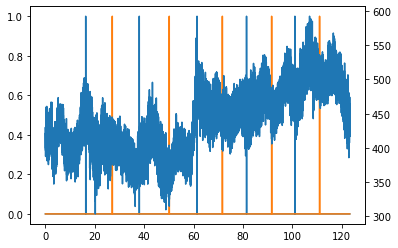

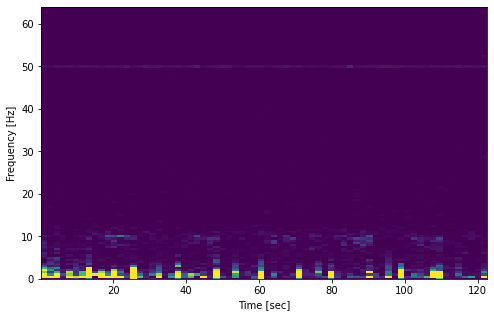

In [15]:
x = x['SIGNAL']

fig, ax = plt.subplots(1,1)
ax.plot(x[:,0], x[:,-2])
ax.plot(x[:,0], x[:,-1])
ax2 = plt.gca().twinx()
ax2.plot(x[:,0], x[:,-4])

fig, ax = plt.subplots(1, 1, figsize=(8,5))
f, t, Sxx = sig.spectrogram(x[:,2], fs=512, nperseg=1024)
ax.pcolormesh(t, f, Sxx, vmin=1, vmax=200)
ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Time [sec]')
ax.set_ylim(0,64)

In [16]:
z = np.vstack([x[:,1], x[:,-4], x[:,-1]*2 + x[:,-2]]).T

In [17]:
np.save('alpha_data_07.npy', z)

In [31]:
data = np.load('alpha_data.npy')

In [44]:
data.shape

(87520, 3)

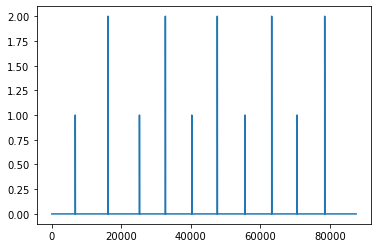

In [45]:
plt.plot(data[:,2])

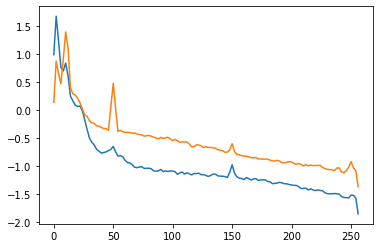

In [36]:
f1, pxx1 = sig.welch(data[:,0], fs=512, nperseg=256)
f2, pxx2 = sig.welch(data[:,1], fs=512, nperseg=256)
plt.plot(f1, np.log10(pxx1))
plt.plot(f2, np.log10(pxx2))

(0.0, 60.0)

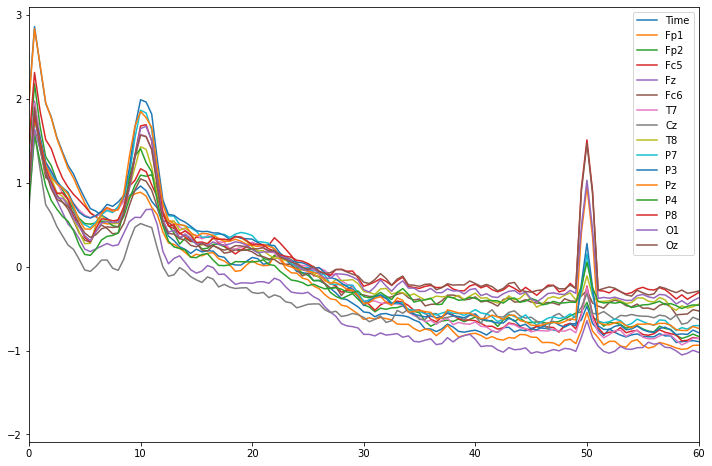

In [43]:
fig, ax = plt.subplots(1,1, figsize=(12,8))
for i in range(x.shape[1]-3):
    f1, pxx1 = sig.welch(x[:,i+1], fs=512, nperseg=1024)
    ax.plot(f1, np.log10(pxx1), label=column_names[i])
ax.legend()
ax.set_xlim(0,60)

In [8]:
y = sig.decimate(x[2:,:], 4, axis=0)
y2 = sig.detrend(y, axis=0)

In [17]:
1/np.mean(np.diff(x[:,0]))

511.9999999850236

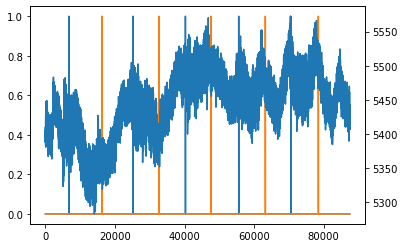

In [8]:
plt.plot(x[:,-2])
plt.plot(x[:,-1])
ax = plt.gca().twinx()
ax.plot(x[:,-4])

[]

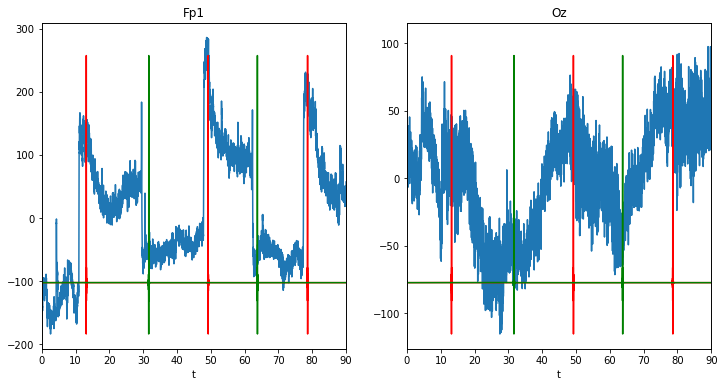

In [9]:
fig, ax = plt.subplots(1,2, figsize=(12,6), sharex=True)
ax[0].plot(x[0::4,0], y2[:,1])
a = ax[0].twinx()
a.plot(x[0::4,0], y[:,-2],'r')
a.plot(x[0::4,0], y[:,-1],'g')
ax[0].set_xlabel('t')
ax[0].set_title('Fp1')
a.set_yticks([])

ax[1].plot(x[0::4,0], y2[:,-4])
ax[1].set_xlim(0,90)
b = ax[1].twinx()
b.plot(x[0::4,0], y[:,-2],'r')
b.plot(x[0::4,0], y[:,-1],'g')
ax[1].set_xlabel('t')
ax[1].set_title('Oz')
b.set_yticks([])



In [10]:
f1, pxx1 = sig.welch(x[:,-4], fs=512, nperseg=128)
f2, pxx2 = sig.welch(x[:,-4], fs=512, nperseg=256)
f3, pxx3 = sig.welch(x[:,-4], fs=512, nperseg=512)
f4, pxx4 = sig.welch(x[:,-4], fs=512, nperseg=1024)

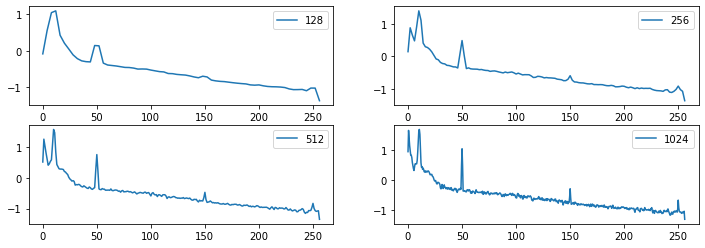

In [11]:
fig, ax = plt.subplots(2,2, figsize=(12,4))
ax[0,0].plot(f1, np.log10(pxx1), label='128')
ax[0,0].legend()
ax[0,1].plot(f2, np.log10(pxx2), label='256')
ax[0,1].legend()
ax[1,0].plot(f3, np.log10(pxx3), label='512')
ax[1,0].legend()
ax[1,1].plot(f4, np.log10(pxx4), label='1024')
ax[1,1].legend()


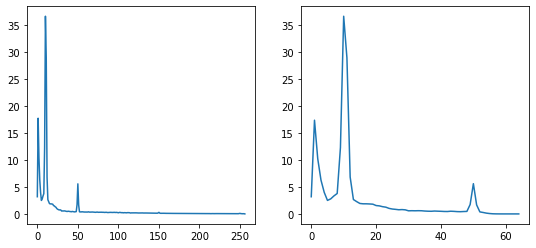

In [12]:
fig, ax = plt.subplots(1,2, figsize=(9,4))
f1, pxx1 = sig.welch(x[:,-4], fs=512, nperseg=512)
ax[0].plot(f1,pxx1)
f2, pxx2 = sig.welch(y2[:,-4], fs=512/4, nperseg=128)
ax[1].plot(f2,pxx2)


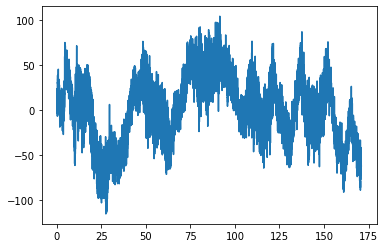

In [13]:
plt.plot(x[0::4,0], y2[:,-4])

In [51]:
from scipy import signal
from scipy.fft import fftshift

In [15]:
x.shape

(87520, 19)

(0.0, 64.0)

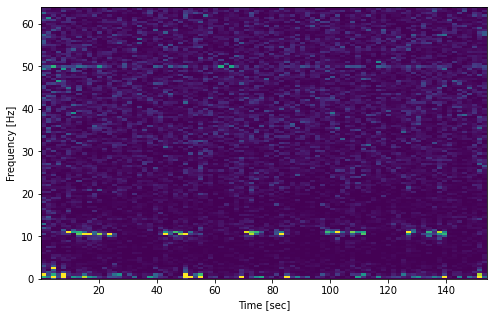

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))
f, t, Sxx = signal.spectrogram(x[:,-3], fs=512, nperseg=1024)
ax.pcolormesh(t, f, Sxx, vmin=1, vmax=200)
ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Time [sec]')
ax.set_ylim(0,64)

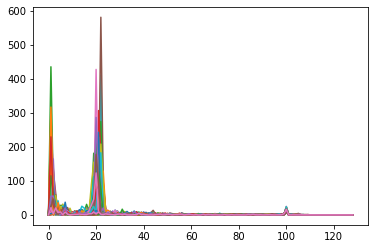

In [24]:
plt.plot(Sxx);